In [984]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [985]:
!ls german-traffic-signs

# the "signnames" contains the traffic signs' labels

# and the rest of 3 files are "pickled" files:
# Pickle in Python is primarily used in serializing and deserializing a Python object structure. 
# In other words, it's the process of converting a Python object into a byte stream to store it in a file/database, 
# maintain program state across sessions, or transport data over the network

# now we need the UNPICKLE them to get the image datas

signnames.csv
test.p
train.p
valid.p


In [986]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

In [987]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [988]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12831768381215462388
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1734816564
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17250305711320886612
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [989]:
np.random.seed(0)

In [990]:
# open pickled files
import pickle

with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [991]:
print(X_train.shape)
print(type(X_train))
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
<class 'numpy.ndarray'>
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [992]:
assert(X_train.shape[0] == y_train.shape[0]), "the number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "the number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]),"the number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [993]:
import pandas as pd

In [994]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


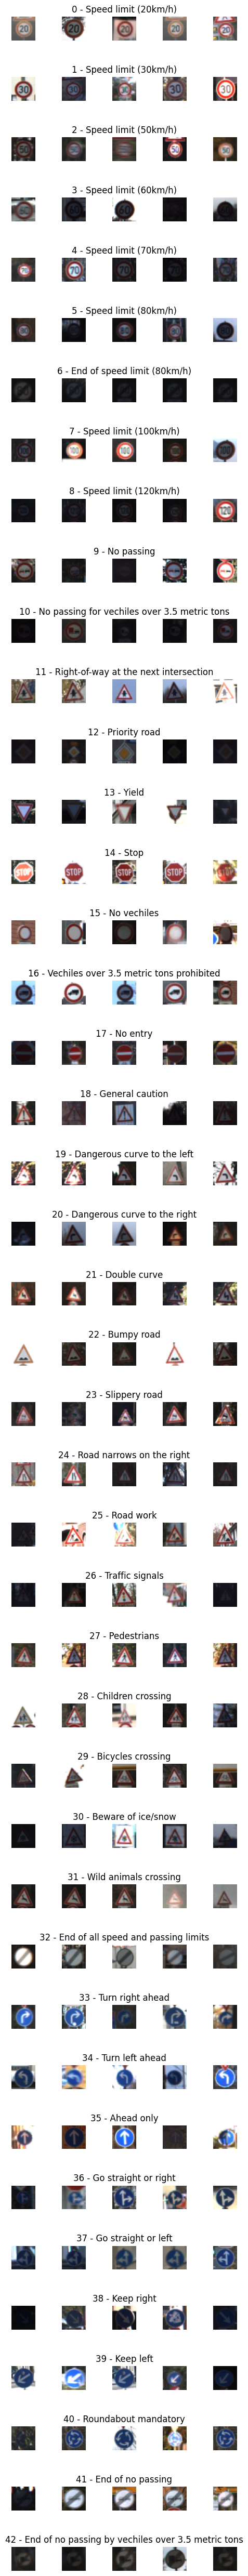

In [995]:
num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


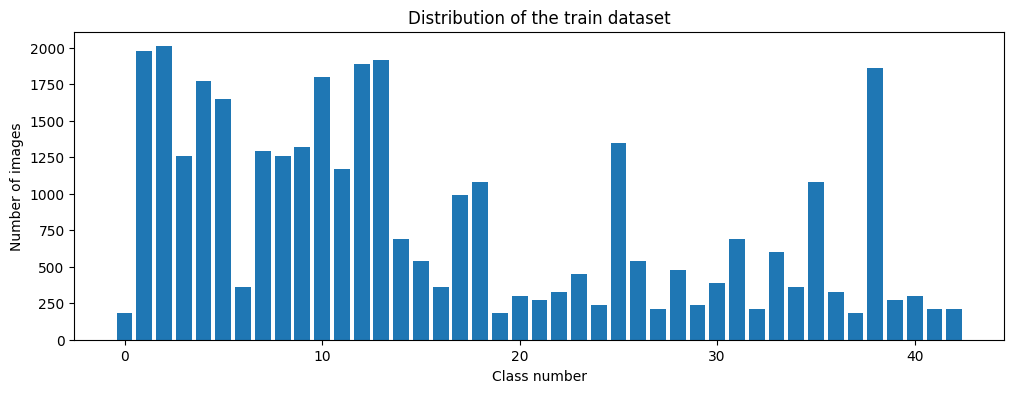

In [996]:
# we want to visualize the distribution of the dataset
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


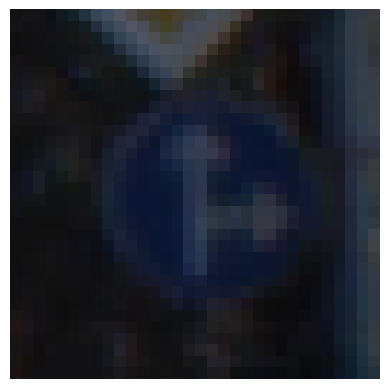

In [997]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


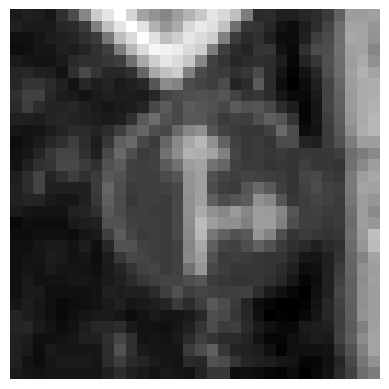

In [998]:
# preprocessing: 
# we use grayscale because color is not a very significant features to look for
# and many variant traffic signs have similar colors
# we also reduce our depth from 3 to 1
# that means our network now require fewer params

def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[1000])
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis("off")
print(img.shape)

(32, 32)


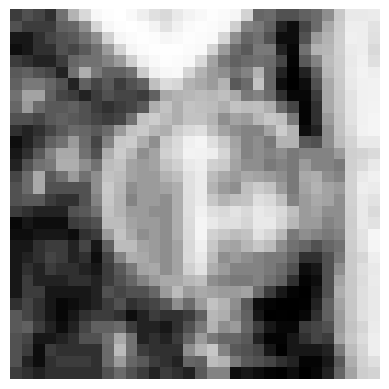

In [999]:
# preprocessing: histogram equalization

# since some of our images are very bright and others are very dim, 
# after histogram qualization, all images have very similar lighting effect

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

img = equalize(img)
plt.imshow(img, cmap='gray')
plt.axis("off")
print(img.shape)

In [1000]:
# notice the increase in contrast, make it easier for our neural network to learn and extract these features
# now we put it all in the preprocessing function

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255 # normalize
    return img

# applying the function to each image in the training dataset
# iterate entire the training dataset
# this return a map object, to get result from map object, always come with list() function 
# change to numpy array from list object to work with neural network, default data
X_train = np.array(list(map(preprocessing, X_train))) 
X_val = np.array(list(map(preprocessing, X_val))) 
X_test = np.array(list(map(preprocessing, X_test))) 

(34799, 32, 32)


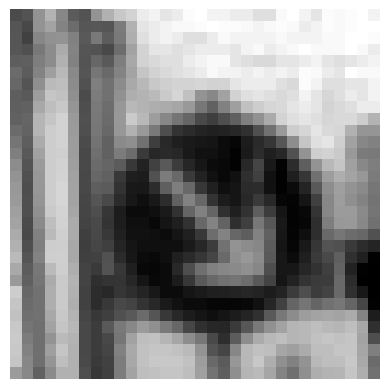

In [1001]:
# testing if the training data has been preprocessed

plt.imshow(X_train[random.randint(0, len(X_train) - 1)], cmap='gray')
plt.axis('off')
print(X_train.shape)

In [1002]:
# preprocess - add depth (grayscale - only 1 layer)

X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [1003]:
# one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [1004]:
# data augmentation ----------------------------------

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10.
)

datagen.fit(X_train) 
# apply the generator on X_train.
# this function allow the generator to CALCULATE statistics required 
# to perform transformations 

(20, 32, 32, 1)


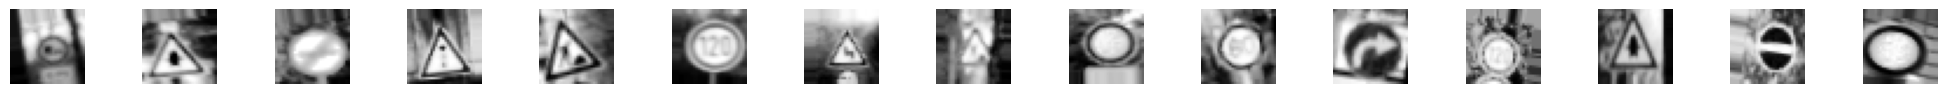

In [1005]:
# the generator only create new augmented images in realtimme when requested
# but it will leads to additional time cost during the training process

# iterator: generate batches of augmented images from X_train
batches = datagen.flow( 
    X_train, # generate new images from X_train
    y_train,  # new images is connected with their respective labels
    batch_size = 20 # a batch of new 20 images along with their respective labels 
) 

# now the batches contain our newly created images
# to get images from the batch
# use next(), each time next() is called, 
# we get new 20 images on the iterator "batches"
X_batch, y_batch = next(batches) 

# plot the images
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32), cmap='gray')
    axs[i].axis("off")

print(X_batch.shape)

In [1006]:
# create model

def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = modified_model()
print(model.summary())

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_128 (Conv2D)         (None, 28, 28, 60)        1560      
                                                                 
 conv2d_129 (Conv2D)         (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 12, 12, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_130 (Conv2D)         (None, 10, 10, 30)        16230     
                                                                 
 conv2d_131 (Conv2D)         (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 4, 4, 30)         0         
 g2D)                                                

c:\Home\development\me-selflearn-machinelearning\machinelearningenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [1007]:
# data augmentation ----------------------------------
batch_size = 50
batches = datagen.flow(X_train, y_train, batch_size=batch_size)

history = model.fit(
    x=batches,
    steps_per_epoch= len(X_train) // batch_size,
    epochs=30,
    validation_data=(X_val, y_val), # we already have the validation data, no need for validation split
    shuffle = 1,
    verbose=1
)

Epoch 1/30
695/695 [==============================] - 8s 11ms/step - loss: 1.7327 - accuracy: 0.5070 - val_loss: 0.3702 - val_accuracy: 0.8857
Epoch 2/30
695/695 [==============================] - 7s 10ms/step - loss: 0.6161 - accuracy: 0.8109 - val_loss: 0.1946 - val_accuracy: 0.9422
Epoch 3/30
695/695 [==============================] - 7s 10ms/step - loss: 0.3844 - accuracy: 0.8813 - val_loss: 0.1044 - val_accuracy: 0.9703
Epoch 4/30
695/695 [==============================] - 7s 10ms/step - loss: 0.2987 - accuracy: 0.9061 - val_loss: 0.0770 - val_accuracy: 0.9757
Epoch 5/30
695/695 [==============================] - 7s 10ms/step - loss: 0.2346 - accuracy: 0.9254 - val_loss: 0.0695 - val_accuracy: 0.9780
Epoch 6/30
695/695 [==============================] - 7s 10ms/step - loss: 0.2065 - accuracy: 0.9367 - val_loss: 0.1170 - val_accuracy: 0.9655
Epoch 7/30
695/695 [==============================] - 7s 10ms/step - loss: 0.1813 - accuracy: 0.9428 - val_loss: 0.0824 - val_accuracy: 0.9751

Text(0.5, 0, 'epoch')

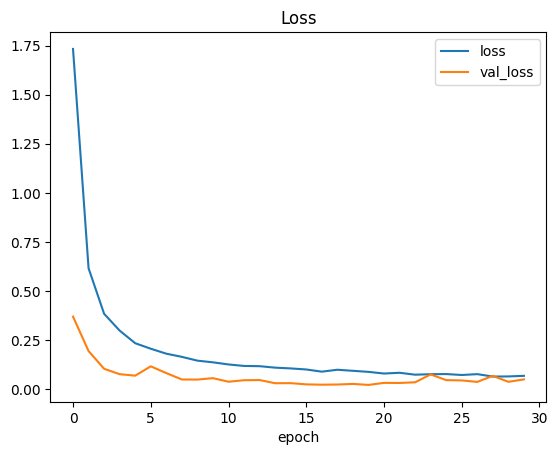

In [1008]:
plt.plot(history.history['loss']) # loss / error
plt.plot(history.history['val_loss']) # validation loss / error
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

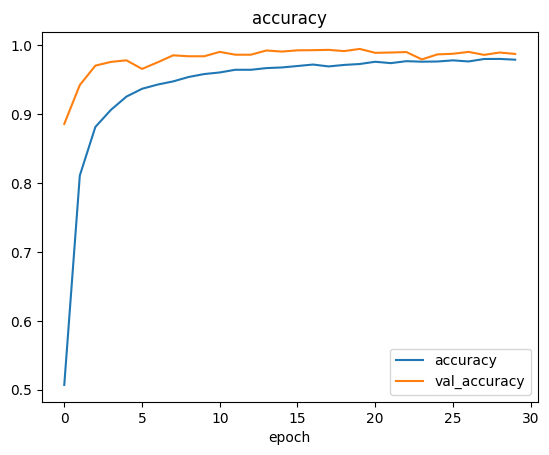

In [1009]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [1010]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test error (Test score): ', score[0])
print('Test accuracy:', score[1])

Test error (Test score):  0.13684289157390594
Test accuracy: 0.9665083289146423


(866, 1300, 3)
(32, 32, 3)


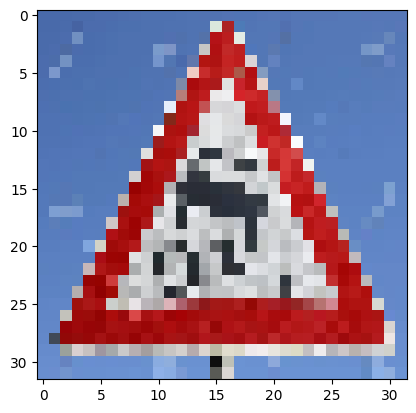

In [1019]:
# predict with real datas
from PIL import Image

img = Image.open('./tut7_traffic_signs/5.png')
plt.imshow(img, cmap=plt.get_cmap('gray'))

# -- resize
img = np.asarray(img)
print(img.shape)
# --
img = cv2.resize(img, (32, 32))
print(img.shape)
plt.imshow(img, cmap = plt.get_cmap('gray'))

(32, 32)
1/1 [==============================] - 0s 20ms/step
predicted sign:  23


,SignName
23,Slippery road


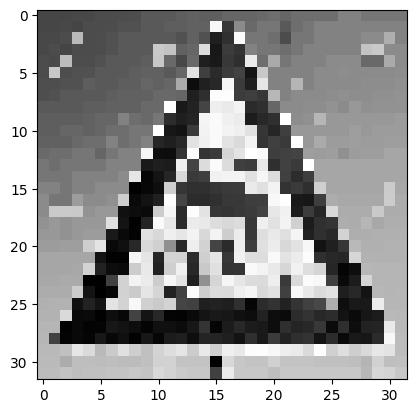

In [1020]:
# --
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)


img = img.reshape(32, 32, 1)
inputs = np.array([img])

# for multi classes
def predict_classes (inputs, model):
    pred = model.predict(inputs) 
    return np.argmax(pred,axis=1) 

#Test image
pred_label = predict_classes(inputs, model)[0]
print("predicted sign: ", pred_label)
data.loc[data['ClassId'] == int(pred_label), ['SignName']]